In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm

%matplotlib inline

In [3]:
df = pd.read_csv("./data/grad.csv")

In [4]:
df.head(2)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3


In [5]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
pd.crosstab(df['rank'],df.admit)

admit,0,1
rank,,
1,28,33
2,97,54
3,93,28
4,55,12


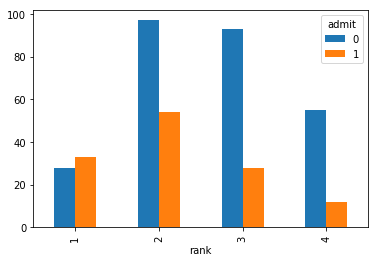

In [16]:
#
# Took a bit
#

# plt.scatter(df['rank'], df['admit'])
# df['rank'].plot()
# df[['rank','admit']].plot(kind='bar')
pd.crosstab(df['rank'],df.admit).plot(kind='bar')

In [30]:
import statsmodels.discrete.discrete_model as discrete_model

In [33]:
logit = discrete_model.Logit(df['admit'], df[['rank', 'gre', 'gpa']])
result = logit.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Jul 2017   Pseudo R-squ.:                 0.06176
Time:                        16:25:42   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 1.971e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rank          -0.6695      0.121     -5.527      0.000      -0.907      -0.432
gre            0.0015      0.001      1.420      0.155      -0.001       0.004
gpa           -0.0042      0.201     -0.021      0.983      -0.398       0.390
==============================================================================
"""

### Kfold

In [36]:
from sklearn import cross_validation
kf = cross_validation.KFold(len(df), n_folds=5, shuffle=True)

kf

/home/archon/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


sklearn.cross_validation.KFold(n=400, n_folds=5, shuffle=True, random_state=None)

In [39]:
from sklearn import linear_model as linear_model
from sklearn import metrics as metrics

In [55]:
#
# Copied/Pasted/Modified code from examples discussed in class
#

X = df[['rank', 'gre', 'gpa']]
y = df['admit']

mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(X.iloc[test_index])))
    scores.append(lm.score(X, y))
    n += 1
    print('Model: %d' % n)
    print('MSE: %f' % mse_values[n-1])
    print('R2: %f' % scores[n-1])

print("\n")
print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: %f' % np.mean(mse_values))
print('Mean of R2 for all folds: %f' % np.mean(scores))


~~~~ CROSS VALIDATION each fold ~~~~
Model: 1
MSE: 0.207748
R2: 0.095175
Model: 2
MSE: 0.198858
R2: 0.095191
Model: 3
MSE: 0.206358
R2: 0.095683
Model: 4
MSE: 0.197778
R2: 0.094911
Model: 5
MSE: 0.175677
R2: 0.095506


~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 0.197284
Mean of R2 for all folds: 0.095293


### With dummies

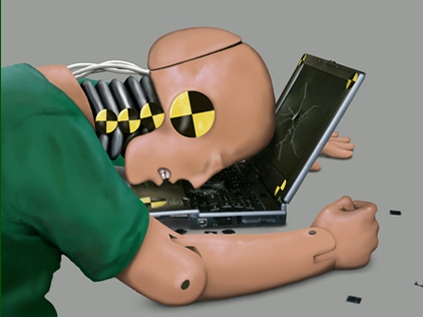

In [47]:
rank_dummies = pd.get_dummies(df['rank'], prefix='rank_')

rank_dummies.head(2)

,rank__1,rank__2,rank__3,rank__4
0,0,0,1,0
1,0,0,1,0


In [49]:
X_2 = df[['gre', 'gpa']].join(rank_dummies)

X_2.head(2)

,gre,gpa,rank__1,rank__2,rank__3,rank__4
0,380,3.61,0,0,1,0
1,660,3.67,0,0,1,0


In [57]:
#
# Copied/Pasted/Modified code from examples discussed in class
# PART 2: Using X_2 and same y
#

mse_values_2 = []
scores_2 = []
n = 0 # index did not add "_2"
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X2.iloc[train_index], y.iloc[train_index])
    mse_values_2.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(X_2.iloc[test_index])))
    scores_2.append(lm.score(X_2, y))
    n += 1
    print('Model: %d' % n)
    print('MSE: %f' % mse_values_2[n - 1])
    print('R2: %f' % scores_2[n - 1])

print("\n")
print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: %f' % np.mean(mse_values_2))
print('Mean of R2 for all folds: %f' % np.mean(scores_2))

~~~~ CROSS VALIDATION each fold ~~~~
Model: 1
MSE: 0.208961
R2: 0.099179
Model: 2
MSE: 0.205193
R2: 0.097602
Model: 3
MSE: 0.208788
R2: 0.098787
Model: 4
MSE: 0.196027
R2: 0.098434
Model: 5
MSE: 0.175660
R2: 0.097755


~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 0.198926
Mean of R2 for all folds: 0.098351


In [ ]:
#
# No change observed
#

## Appendix

Things tried but not used

In [20]:
LR = linear_model.LogisticRegression()

In [26]:
model = LR.fit(df[['rank', 'gre', 'gpa']], df['admit'])

In [28]:
predictions = model.predict(df[['rank', 'gre', 'gpa']])
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0,